<a href="https://colab.research.google.com/github/Arunimad/CCIR_NLP/blob/main/TA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A well-known example of ambiguity is shown in (2), from the Groucho Marx movie, Animal Crackers (1930):

	While hunting in Africa, I shot an elephant in my pajamas. How he got into my pajamas, I don't know.

  Let's take a closer look at the ambiguity in the phrase: I shot an elephant in my pajamas. First we need to define a simple grammar:


In [1]:
import nltk

In [5]:
groucho_grammar = nltk.CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | Det N PP | 'I'
... VP -> V NP | VP PP
... Det -> 'an' | 'my'
... N -> 'elephant' | 'pajamas'
... V -> 'shot'
... P -> 'in'
... """)

Syntactic Categories

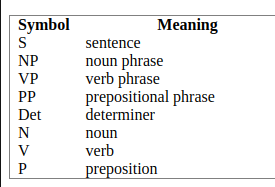

In [28]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']

In [29]:
parser = nltk.ChartParser(groucho_grammar)

In [32]:
trees = list(parser.parse(sent))

In [ ]:
for tree in parser.parse(sent):
  print(tree)

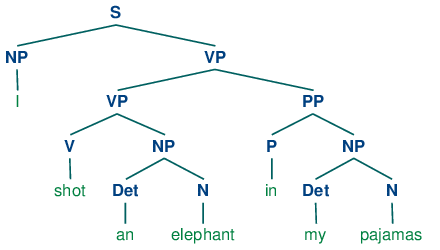


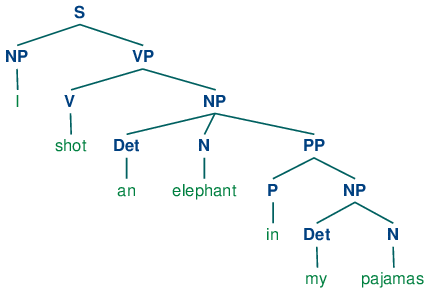



In [21]:
from nltk.grammar import *

In [34]:
type(tree[0])

nltk.tree.tree.Tree

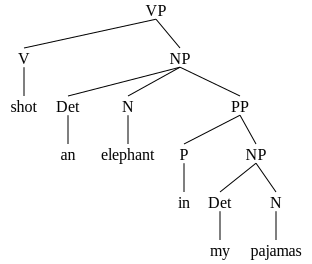

In [36]:
tree[1]

In [24]:
pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 6.1 MB/s eta 0:00:00


e.g. the word shot doesn't refer to the act of using a gun in the first sentence, and using a camera in the second sentence

CFG. Context Free Grammar

In [12]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [ ]:
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
  print(tree)

Using Trace
https://tedboy.github.io/nlps/generated/generated/nltk.parse.RandomChartParser.trace.html

In [ ]:
sent = "Mary saw Bob".split()
rd_parser = nltk.RecursiveDescentParser(grammar1, trace =2)
for tree in rd_parser.parse(sent):
  print(tree)

**Ambiguity and Context-Free Grammar**

   Bart watched a squirrel with binoculars. 

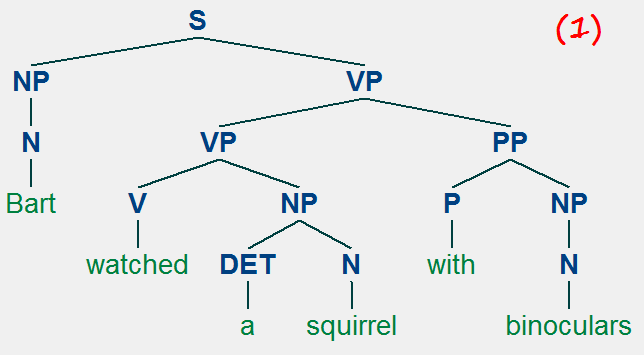

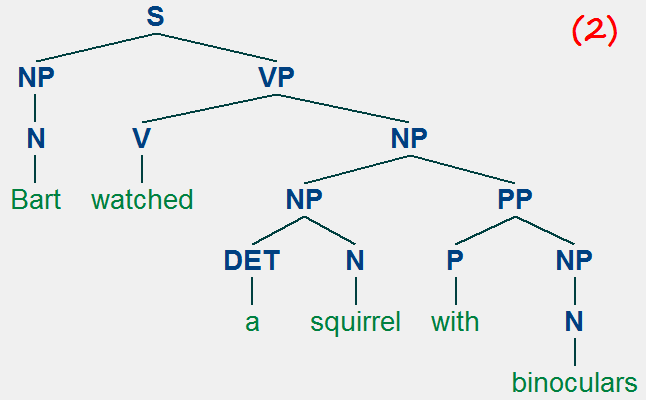


Phrase-structure grammar in the form of context-free grammar (CFG) is the standard grammar formalism in many syntactic theories and also language engineering

Chomsky Hierarchy

In formal language theory (which is coming up in a few weeks), context-free languages are a type of languages that are more complex than regular languages. The theory has three dimensions: (1) automata (FSA, Turing machine, etc.), (2) languages (regular languages, context-free languages, etc.), and finally (3) the grammar


NLTK's nltk.grammar is the module for handling formal grammars. nltk.CFG, whose original location is nltk.grammar.CFG, implements the context-free grammar. You can create a grammar object using its .fromstring() method, with the grammar rules represented as a multi-line string. The parent node of the very top rule is construed as the start symbol.

In [38]:
 	grammar2 = nltk.CFG.fromstring("""
    S -> NP VP
    NP -> PRO | DET N
    DET -> 'the' | 'a'
    N -> 'dog' | 'cat'
    PRO -> 'she'
    VP -> V NP
    V -> 'likes'
  """)

In [ ]:
>>> print(grammar2)

In [ ]:
type(grammar2)

grammar2 has two components: (1) a start symbol, and (2) a list of CF rules. They can be accessed via .start() and .productions():

In [ ]:
grammar2.start()

In [ ]:
grammar2.productions()

In [ ]:
srule = grammar2.productions()[0]
srule

In [ ]:
srule.lhs()


In [ ]:
srule.rhs()


In [ ]:
type(srule)

Creating CFG

Just like with tree objects, it's a bit of an involved process. A CF rule is made up of a the lefthand side, which is occupied by a non-terminal node object; its right-hand side is occupied by a tuple of objects, each of which is either a non-terminal or a terminal node. You have to build a non-terminal node using a class constructor from the label string; the terminal node can simply be a string.

In [50]:
node1 = nltk.grammar.Nonterminal('ADV')

In [ ]:
node1

In [ ]:
type(node1)

In [53]:
rule1 = nltk.grammar.Production(node1, ('happily',))

In [ ]:
print(rule1)

In [ ]:
type(rule1)

In [57]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

**Treebanks and Grammar**

NLTK includes a sample section of the Penn Treebank (3914 sentences and about 10% of the entire corpus), which is a syntactically annotated corpus of English. It can be accessed by nltk.corpus.treebank.parsed_sents().

Below is the very first sentence of the Treebank corpus. It's possible to print it out and draw the tree diagram.

In [58]:
tr1 = nltk.corpus.treebank.parsed_sents()[0]

In [60]:
print(tr1)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


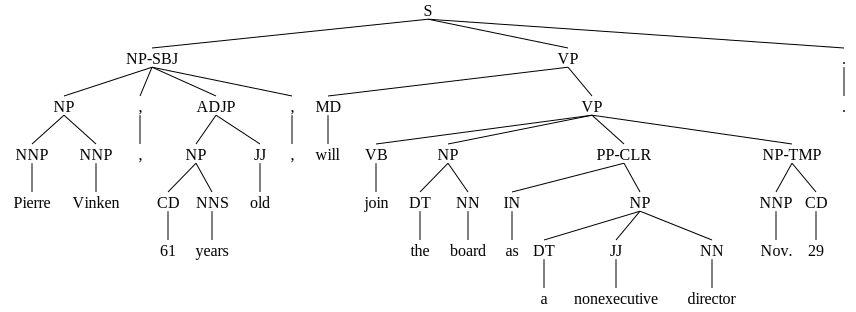

In [59]:
 tr1

In [ ]:
tr1.draw()

In [ ]:
tr1.pretty_print()

**Parser Types**

Recursive Descent Parsing

The simplest kind of parser interprets a grammar as a specification of how to break a high-level goal into several lower-level subgoals. The top-level goal is to find an S. The S → NP VP production permits the parser to replace this goal with two subgoals: find an NP, then find a VP. Each of these subgoals can be replaced in turn by sub-sub-goals, using productions that have NP and VP on their left-hand side. Eventually, this expansion process leads to subgoals such as: find the word telescope. Such subgoals can be directly compared against the input sequence, and succeed if the next word is matched. If there is no match the parser must back up and try a different alternative.

Stages

The recursive descent parser builds a parse tree during the above process. With the initial goal (find an S), the S root node is created. As the above process recursively expands its goals using the productions of the grammar, the parse tree is extended downwards (hence the name recursive descent). We can see this in action using the graphical demonstration nltk.app.rdparser()

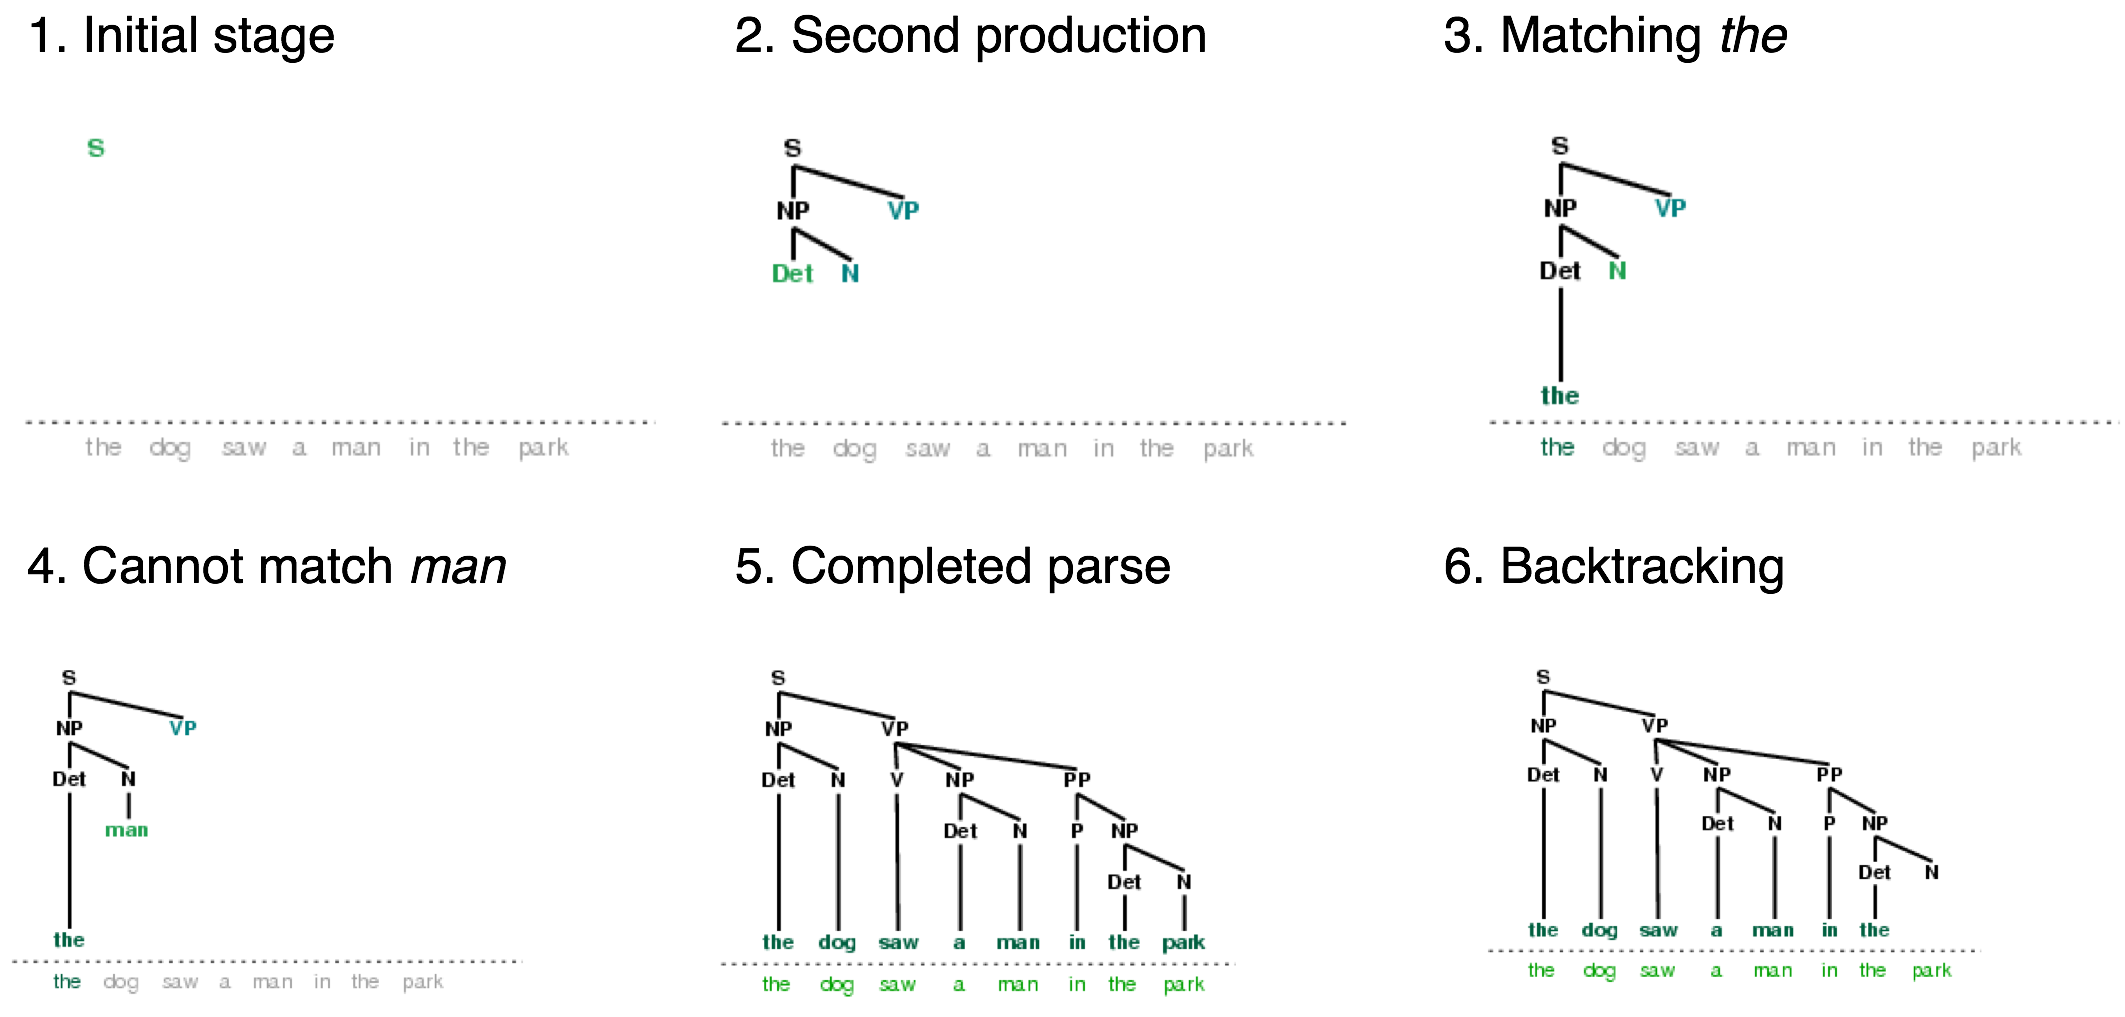

In [63]:
rd_parser = nltk.RecursiveDescentParser(grammar1)
sent = 'Mary saw a dog'.split()
for tree in rd_parser.parse(sent):
  print(tree)

(S (NP Mary) (VP (V saw) (NP (Det a) (N dog))))


Disadv

Recursive descent parsing has three key shortcomings. First, left-recursive productions like NP -> NP PP send it into an infinite loop. Second, the parser wastes a lot of time considering words and structures that do not correspond to the input sentence. Third, the backtracking process may discard parsed constituents that will need to be rebuilt again later. For example, backtracking over VP -> V NP will discard the subtree created for the NP. If the parser then proceeds with VP -> V NP PP, then the NP subtree must be created all over again.

More types and further reading at

https://www.nltk.org/book/ch08.html#a-simple-grammar